# Perlin noise from scratch
**Perlin noise** is a *gradient noise*, which is used mostly in *Computer Graphics* for creating mountains, terrains, clouds, and textures.
<br> Here, we implement the two-dimensional (2D) version of Perlin noise with the help of a *permutation table*. There are other ways to implement Perlin noise though.
###### by Hamed Shah-Hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
# importing the required modules
from math import floor
import random
from PIL import Image

In [2]:
P_size=256 # size of the permutation table
P=[i for i in range(P_size)]
random.shuffle(P) #randomize the table
# a class to define 2D points and vectors
class Vec2:
    def __init__(self,x=0.,y=0.):
        self.x=x
        self.y=y
# the gradients are vectors form the center of a square to its vertices.
gradients=[Vec2(-1.,-1.),Vec2(-1.,1.),Vec2(1.,-1.),Vec2(1.,1.)]

In [3]:
# returns fractional part of v 
def fract(v):
    w=Vec2()
    w.x=v.x-floor(v.x)
    w.y=v.y-floor(v.y)
    return w  

# linear interpolation
def interp(a0,a1,alpha):
    # using smoothstep or fade function
    alpha=(3.0 - alpha * 2.0) * alpha * alpha 
    #alpha=((alpha * (alpha * 6.0 - 15.0) + 10.0) * alpha**3) 
    return a0+alpha*(a1-a0)

#gradient vector of a vertex based on permutation table 
def gradient_of_corner(p):
    u=Vec2()
    val_of_corner=P[abs(P[abs(p.x)%P_size]+p.y)%P_size]
    val_of_corner%=3
    return gradients[val_of_corner]

# dot product of gradient vector and distance vector
def gradient_dot(x0y0,xy):
    gradient=gradient_of_corner(x0y0)
    dx=xy.x-x0y0.x
    dy=xy.y-x0y0.y
    return gradient.x*dx+gradient.y*dy

#perlin noise for a 2D point
def noise_perlin(p):
    i=Vec2(); iTemp=Vec2()
    i.x=floor(p.x); i.y=floor(p.y)
    s=fract(p)
    # Four corners of a 2D square
    f00 = gradient_dot(i,p)
    iTemp.x=i.x+1; iTemp.y=i.y
    f10 = gradient_dot(iTemp,p)
    iTemp.x=i.x; iTemp.y=i.y+1
    f01 = gradient_dot(iTemp,p)
    iTemp.x=i.x+1; iTemp.y=i.y+1
    f11 = gradient_dot(iTemp,p)
    vx0=interp(f00,f10,s.x)
    vx1=interp(f01,f11,s.x)
    value=interp(vx0,vx1,s.y)
    return value

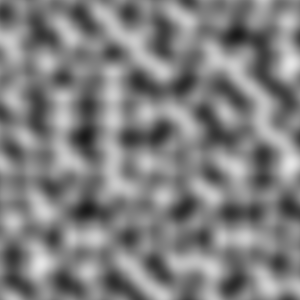

In [4]:
#displaying the noise image for the given frequency
# the noise range here is in [-1,1]
width,height=300,300
img = Image.new( 'RGB', (width,height), 'black') # create a new black image
pixels = img.load() # create the pixel map
point=Vec2()
freq=12. #frequency
for x in range(width):
    for y in range(height):
        point.x=freq*x/width; point.y=freq*y/height
        value=int(255*(.5+.5*noise_perlin(point)))
        pixels[x,y]=(value,value,value)
#img.show()
img